In [6]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Set the parameters
sample_rate = 48000  # 48 kHz
duration = 10  # 10 seconds
amplitude = 1.0  # Amplitude of the noise

# Generate white Gaussian noise
num_samples = int(sample_rate * duration)
white_noise = amplitude * np.random.randn(num_samples)

# Normalize the audio to 16-bit PCM format (-32768 to 32767)
white_noise = np.int16(white_noise * 32767)

# Specify the output WAV file name
output_file = "white_noise.wav"

# Save the white noise as a WAV file
wavfile.write(output_file, sample_rate, white_noise)

print(f"White Gaussian noise saved as {output_file}")


White Gaussian noise saved as white_noise.wav


In [2]:
from IPython.display import Audio

# Play the audio within the notebook
Audio(output_file)

In [3]:
import numpy as np
from scipy.io import wavfile

# Set the parameters
sample_rate = 48000  # 48 kHz
duration = 10  # 10 seconds
start_freq = 20  # Starting frequency in Hz
end_freq = 20000  # Ending frequency in Hz

k = (end_freq-start_freq)/10

# Generate a time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)


# Create a sine wave with the changing frequency
signal = np.sin(2 * np.pi * start_freq * t + np.pi * k * t**2)

# Normalize the audio to 16-bit PCM format (-32768 to 32767)
signal = np.int16(signal * 32767)

# Specify the output WAV file name
output_file = "frequency_ramp.wav"

# Save the frequency ramp as a WAV file
wavfile.write(output_file, sample_rate, signal)

print(f"Frequency ramp saved as {output_file}")


Frequency ramp saved as frequency_ramp.wav


In [4]:
from IPython.display import Audio

# Play the audio within the notebook
Audio('frequency_ramp.wav')

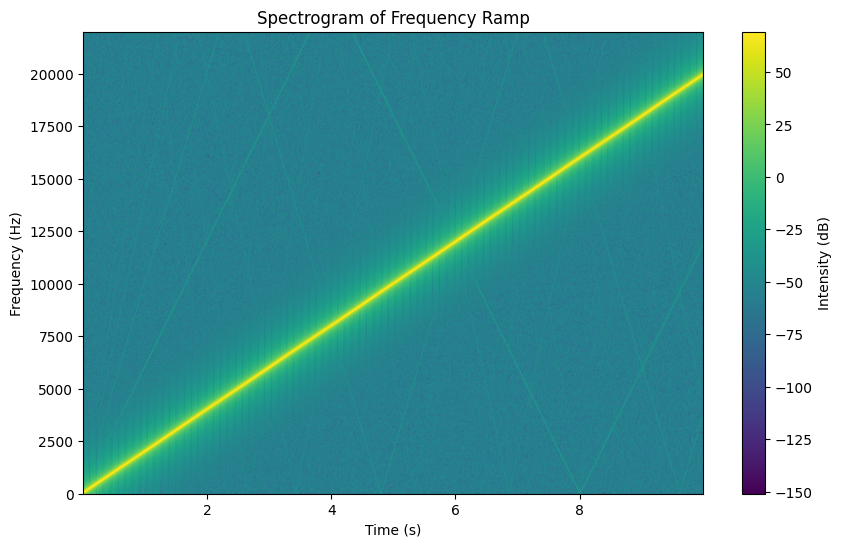

In [7]:
# Load the WAV file
sample_rate, signal = wavfile.read("frequency_ramp.wav")

# Create a spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(signal, Fs=sample_rate, cmap='viridis', NFFT=1024, noverlap=512)
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram of Frequency Ramp')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 22000)  # Adjust the frequency range if needed
plt.show()


Frequency ramp saved as frequency_ramp_exp.wav


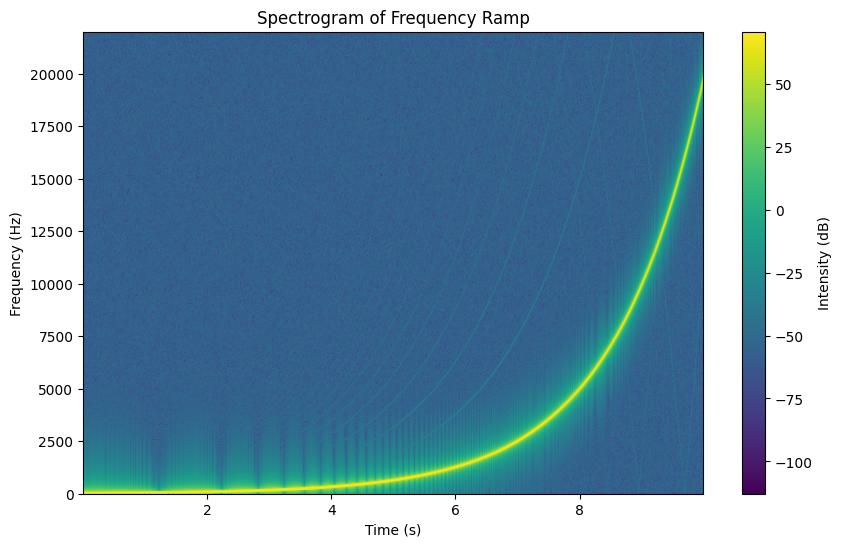

In [8]:
import numpy as np
from scipy.io import wavfile

# Set the parameters
sample_rate = 48000  # 48 kHz
duration = 10  # 10 seconds
start_freq = 20  # Starting frequency in Hz
end_freq = 20000  # Ending frequency in Hz

k = (end_freq/start_freq)**(1/10)

# Generate a time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)


# Create a sine wave with the changing frequency
signal = np.sin(2 * np.pi * start_freq * (k**t-1)/np.log(k))

# Normalize the audio to 16-bit PCM format (-32768 to 32767)
signal = np.int16(signal * 32767)

# Specify the output WAV file name
output_file = "frequency_ramp_exp.wav"

# Save the frequency ramp as a WAV file
wavfile.write(output_file, sample_rate, signal)

print(f"Frequency ramp saved as {output_file}")


# Load the WAV file
sample_rate, signal = wavfile.read("frequency_ramp_exp.wav")

# Create a spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(signal, Fs=sample_rate, cmap='viridis', NFFT=1024, noverlap=512)
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram of Frequency Ramp')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 22000)  # Adjust the frequency range if needed
plt.show()

In [17]:

from IPython.display import Audio

# Play the audio within the notebook
Audio('frequency_ramp.wav')

In [18]:

from IPython.display import Audio

# Play the audio within the notebook
Audio('frequency_ramp_exp.wav')

In [16]:
import scipy.io.wavfile 
import scipy.signal as signal

input_file = "disposable_heroes.wav"
output_file = "disposable_heroes2.wav"


sample_rate, audio_data = wav.read(input_file)


target_sample_rate = 48000

# Check if the audio is already mono (single channel)
if len(audio_data.shape) == 1:
    print("The audio is already mono.")
else:
    # Convert stereo audio to mono by averaging channels
    audio_data = audio_data.mean(axis=1).astype(audio_data.dtype)


upsampled_audio = signal.resample(audio_data, int(len(audio_data) * (target_sample_rate / sample_rate)))


wav.write(output_file, target_sample_rate, upsampled_audio.astype(audio_data.dtype)[0:10*48000])

print(f"Upsampled and saved to {output_file} at {target_sample_rate} Hz sample rate.")


Upsampled and saved to disposable_heroes2.wav at 48000 Hz sample rate.


C:\Users\joaco\AppData\Local\Temp\ipykernel_14872\94317097.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wav.read(input_file)


In [13]:
import scipy.io.wavfile as wav
import scipy.signal as signal

input_file = "rimbaud.wav"
output_file = "rimbaud2.wav"


# Read the original WAV file
sample_rate, audio_data = wav.read(input_file)

# Check if the audio is already mono (single channel)
if len(audio_data.shape) == 1:
    print("The audio is already mono.")
else:
    # Convert stereo audio to mono by averaging channels
    mono_audio = audio_data.mean(axis=1).astype(audio_data.dtype)

    # Save the mono audio as a new WAV file
    wav.write(output_file, sample_rate, mono_audio[0:10*48000])

    print(f"Converted to mono and saved as {output_file}")

Converted to mono and saved as rimbaud2.wav
